## Curvilinear grid Great Circle Interpolation of tracer points

Using [xmitgcm](https://xmitgcm.readthedocs.io/en/latest) to load `tutorial_global_oce_latlon` grid and interpolate from grid to specified lat lons (in a linearly spaced vector to start). 

Goal: save ssp and bathymetry along specified lat lons

In [1]:
import sandbox as sb
import numpy as np
import xarray as xr
import xmitgcm

# Plotting
import matplotlib.pyplot as plt

In [2]:
data_dir = '/home/ivana/tutorial_global_oce_latlon/run'
grid_dir = data_dir

In [3]:
ds = xmitgcm.open_mdsdataset(data_dir, 
                             prefix=['ssp', 'T'], 
                             iters=[20])

In [4]:
ds

<xarray.Dataset>
Dimensions:   (XC: 90, XG: 90, YC: 40, YG: 40, Z: 15, Zl: 15, Zp1: 16, Zu: 15, time: 1)
Coordinates:
    iter      (time) int64 20
  * time      (time) timedelta64[ns] 00:00:20
  * XC        (XC) >f4 2.0 6.0 10.0 14.0 18.0 ... 342.0 346.0 350.0 354.0 358.0
  * YC        (YC) >f4 -78.0 -74.0 -70.0 -66.0 -62.0 ... 66.0 70.0 74.0 78.0
  * XG        (XG) >f4 0.0 4.0 8.0 12.0 16.0 ... 340.0 344.0 348.0 352.0 356.0
  * YG        (YG) >f4 -80.0 -76.0 -72.0 -68.0 -64.0 ... 64.0 68.0 72.0 76.0
  * Z         (Z) >f4 -25.0 -85.0 -170.0 -290.0 ... -3575.0 -4190.0 -4855.0
  * Zp1       (Zp1) >f4 0.0 -50.0 -120.0 -220.0 ... -3870.0 -4510.0 -5200.0
  * Zu        (Zu) >f4 -50.0 -120.0 -220.0 -360.0 ... -3870.0 -4510.0 -5200.0
  * Zl        (Zl) >f4 0.0 -50.0 -120.0 -220.0 ... -3280.0 -3870.0 -4510.0
    rA        (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    drC       (Zp1) >f4 25.0 60.0 85.0 120.0 165.0 ... 565.0 615.0 665.0 345.0
    drF       (Z) >f4 50.0 70.0 100.0 140.0 190.0 ... 540.0 590.0 640.0 690.0
    PHrefC    (Z) >f4 245.25 833.85 1667.7 2844.9 ... 35070.75 41103.9 47627.55
    PHrefF    (Zp1) >f4 0.0 490.5 1177.2 2158.2 ... 37964.7 44243.1 51012.0
    hFacC     (Z, YC, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacW     (Z, YC, XG) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacS     (Z, YG, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskC     (Z, YC, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    rhoRef    (Z) >f4 1024.8727 1025.1355 1025.5072 ... 1042.302 1044.9393
    dxF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxV       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyU       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
Data variables:
    ihop_ssp  (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 15, 40, 90), meta=np.ndarray>
    T         (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 15, 40, 90), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=[2...

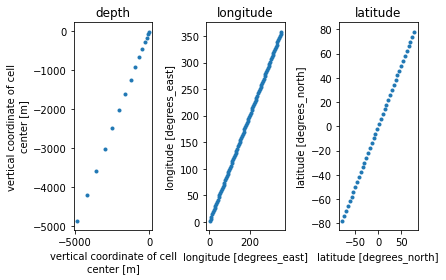

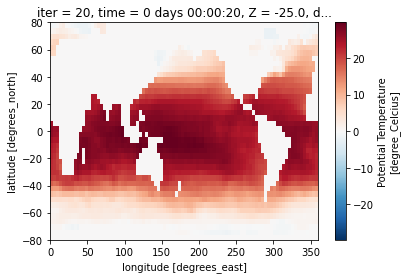

In [5]:
lineVars = ['Z', 'XC', 'YC']; i = 0
fig, axes = plt.subplots(ncols=3)
for var in lineVars: 
    ds[var].plot( ax=axes[i], lw=0, marker='.')
    axes[i].title.set_text(ds[var].attrs['standard_name'])
    i = i+1
plt.tight_layout()
plt.show()

ds.T.isel(Z=0).plot()
plt.show()

# example weight calc

assume we want weights at the point [290.5, 39.1]degrees. We find the indices of the tracer point southwest of the point, and calc the normalized distances to the point, $s_{lon}, s_{lat}$

In [6]:
#   XC        YC
pt =[290.5,   39.1]

In [7]:
s_lon = sb.gcDistance(ds.YC[29], ds.XC[71], ds.YC[29], pt[0]) / \
        sb.gcDistance(ds.YC[29], ds.XC[71], ds.YC[29], ds.XC[72])

s_lat = sb.gcDistance(ds.YC[29], ds.XC[71], pt[1], ds.XC[71]) / \
        sb.gcDistance(ds.YC[29], ds.XC[71], ds.YC[30], ds.XC[71])

print(s_lat, s_lon)

<xarray.DataArray ()>
array(0.275)
Coordinates:
    XC       >f4 286.0 <xarray.DataArray ()>
array(1.12497698)
Coordinates:
    YC       >f4 38.0
    XC       >f4 286.0


In [11]:
ds.YC[30]-ds.YC[29]

<xarray.DataArray 'YC' ()>
array(4., dtype=float32)